## 3.1 지도학습

##### 지도학습이란? 컴퓨터에게 정답(label)을 미리 알려주고 데이터를 학습시키는 방법
##### 지도학습 두가지 방법: 분류, 회귀

분류(classification): 데이터를 정해진 범주에 따라 분류

회귀(regression): 데이터들의 특성(feature)을 기준으로 그래프로 표현 후 패턴이나 트렌드를 예측

# 1.k-nearst neighbor(분류)
### 기존 클러스터에서 데이터와 인스턴스 기반 '거리'를 측정한 후 가장 많은 속설을 가진 클러스터에 할당하는 분류 알고리즘
### k값 선택이 중요

In [7]:
#라이브러리 호출 및 데이터 준비

import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

dataset = pd.read_csv('C:/Users/dlwnr/data_science/deep_learning_pytorch/data/chap03/data/iris.data')
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal- width', 'class']

In [8]:
dataset

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
# 훈련,테스트 데이터셋 분리

x = dataset.iloc[:,:-1].values 
y = dataset.iloc[:,4].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.20) 

from sklearn.preprocessing import StandardScaler
s = StandardScaler() #스케일링, 평균0/표준편차1이 되도록 변환
x_train = s.fit_transform(x_train)
x_test = s.fit_transform(x_test)

x_train과 y_train을 사용해 모델을 만들고 x_test를 모델에 넣어 y_pred를 구하고 y_pred와 y_test를 비교하여 정확도를 구한다.

In [17]:
# 모델 생성 및 훈련

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50) #k설정 및 모델 생성
knn.fit(x_train,y_train) #모델훈련 

KNeighborsClassifier(n_neighbors=50)

In [18]:
#모델 정확도 측정

from sklearn.metrics import accuracy_score
y_pred = knn.predict(x_test)
print('정확도 : {}'.format(accuracy_score(y_test,y_pred)))

정확도 : 0.8


In [20]:
#최적의 k찾기
k = 10
acc_array = np.zeros(k)
for  k in np.arange(1,k+1,1): #k는 1에서 10까지 값
    classifier = KNeighborsClassifier(n_neighbors=k).fit(x_train,y_train) #for문을 반복하며 k값 변경
    y_pred =classifier.predict(x_test)
    acc = metrics.accuracy_score(y_test,y_pred)
    acc_array[k-1] = acc

max_acc = np.amax(acc_array)
acc_list = list(acc_array)
k = acc_list.index(max_acc)
print('정확도',max_acc,'으로 최적의 k는',k+1,'입니다.')

정확도 0.9666666666666667 으로 최적의 k는 1 입니다.


# 2.SVM_서포트 벡터 머신 (분류)
### 분류를 위한 기준선을 정의하는 모델이다. 즉, 새로운 데이터가 나타나면 결정경계(기준선)를 기준으로 어느쪽에 속하는지 분류한다.
### 커널선택 중요/ 텍스트분류

### 마진: 결정경계와 서포트벡터 사이의 거리
### 서포트 벡터: 결정경계와 가장 가까이 있는 데이터

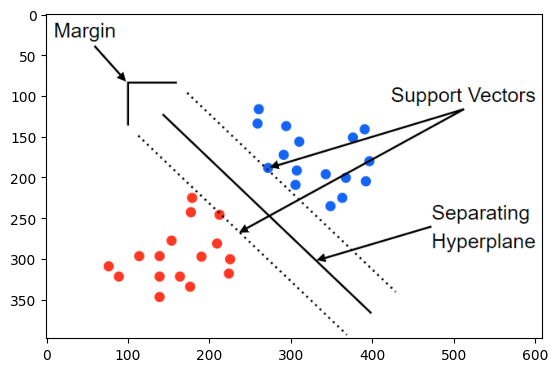

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as img

image = img.imread('C:/Users/dlwnr/data_science/screenshot/img.png')
plt.imshow(image)
plt.show()

## 최적의 결정경계는 마진을 최대로 해야한다.
#### 이상치(outlier) 허용안한다=>하드마진(hard margin)
####   허용한다=>소프트마진(soft margin)


In [34]:
# 라이브러리 호출 
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'#TF_CPP_MIN_LOG_LEVEL(환경변수)를 사용하여 로깅을 제어 #ERROR로그를 추가로 필터링


In [39]:
#데이터 준비 및 훈련, 테스트데이터셋으로 분리
iris = datasets.load_iris() #사이킷런에서 제공하는 iris 데이터호출
x_train,x_test,y_train,y_test = model_selection.train_test_split(iris.data,
                                                                iris.target,
                                                                test_size=0.6,
                                                                random_state=42)

In [46]:
from sklearn import svm
#SVM모델에 대한 정확도
svm = svm.SVC(kernel='linear', C=1.0 ,gamma=0.5)
svm.fit(x_train,y_train)#훈련데이터를 사용하여 SVM모델을 훈련
predictioins = svm.predict(x_test)#훈련된 모델을 사용하여 예측
score = metrics.accuracy_score(y_test,predictioins)
print('정확도 : {0:f}'.format(score))


정확도 : 0.988889


#### 데이터가 선형분류로 해결이 된다면 좋지만 선형으로 해결이 되지 않는다면? 
비선형 문제를 해결하는 방법은 저차원 데이터를 고차원데이터로 보내는것(많은 수학적 계산 필요)
이런한 문제를 해결해주고자
커널트릭(kernel_trick)이 제시 되었다.



##### 선형모델을 위한 커널: 선형(linear)커널   
##### 비선형모델을 위한 커널: 가우시안BRF커널, 다항식(Poly)커널  
###### 위의 커널은 추가적으로 배워야한다.

# 3.결정트리(분류)
### 결정과정이 시각적으로 표현되기 때문에 머신러닝이 어떠한 방식으로 의사결정이 하는지 알고 싶을 때 사용
### 이상치가 많은 값으로 구성된 데이터셋일 때 사용

##### 결정트리는 데이터를 분류한 후에 각 영역의 순도(homogenieity)는 증가,불순도(impurity)와 불확실성(uncertainty)들은 감소 하는 방향으로 학습이 진행된다.
        순도(homogenieity): 범주 안에서 같은 종류의 데이터만 존재, 서로 다른 데이터가 추가된다면 순도는 줄어들며 불순도는 올라간다.
        엔트로피(entropy): 불확실성을 수치로 나타낸것 
        지니계수(Gini index): 불순도를 측정하는 지표, 데이터의 통계적 '분산정도'를  정량화 하여 표현한 값. 즉, 원소n개 중에서 임으로 2개를 추출했을때 추출된 두개가 서로 다른 그룹에 있을 확률

In [30]:
#라이브러리 호출 및 데이터 준비
import pandas as pd
df = pd.read_csv('C:/Users/dlwnr/data_science/deep_learning_pytorch/data/chap03/data/titanic/train.csv',index_col='PassengerId')
print(df.head())


             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S

In [31]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
# 데이터 전처리
df = df[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Survived']] # 원하는 컬럼만 뽑기
df['Sex'] = df['Sex'].map({'male':0,'female':1}) # 성별에서 female=1,male=0으로 바꿔준다.
df=df.dropna() #894개의 데이터가 714개로 줄었다.
x = df.drop('Survived',axis=1)  # 설명변수(independt variable)
y = df['Survived']              # 종속변수(dependent variable)
